## Import Libraries
Import the necessary libraries for data analysis, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the Dataset
Load the Mushroom dataset from the UCI repository and display the first few rows.

In [3]:
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]


In [4]:
data = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)


In [5]:
print(data.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.replace('?', np.nan, inplace=True)
missing_values = data.isnull().sum()
print(missing_values)


class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [8]:
data.dropna(inplace=True)


## Dataset Overview
Understand the structure of the dataset, including its shape, missing values, and data types.

In [9]:
print(data.isnull().sum())


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


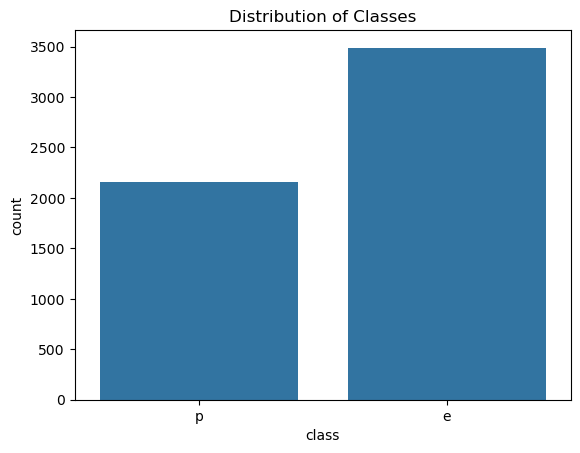

In [10]:
sns.countplot(x='class', data=data)
plt.title('Distribution of Classes')
plt.show()


### Visualizing Feature Distributions
Understand how individual features differ between edible and poisonous mushrooms.

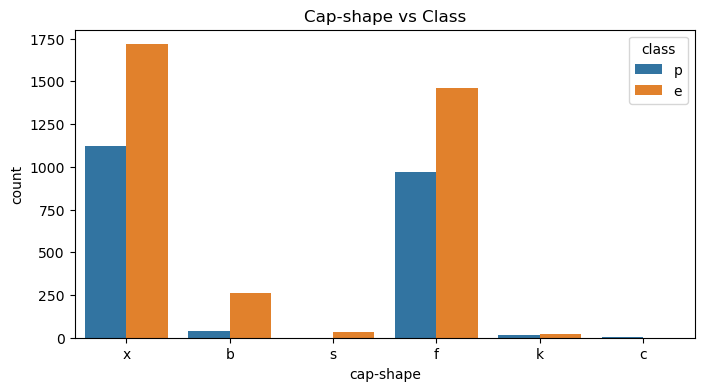

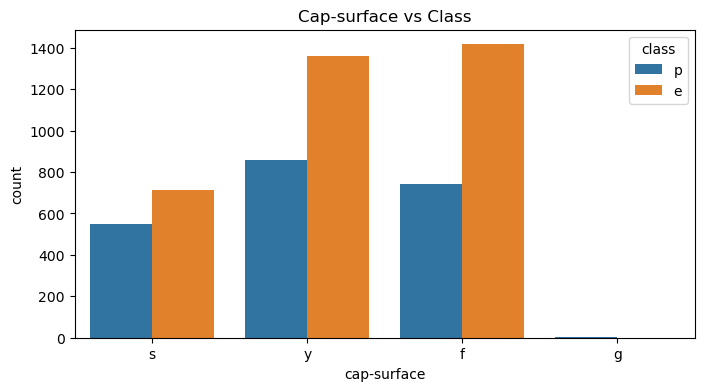

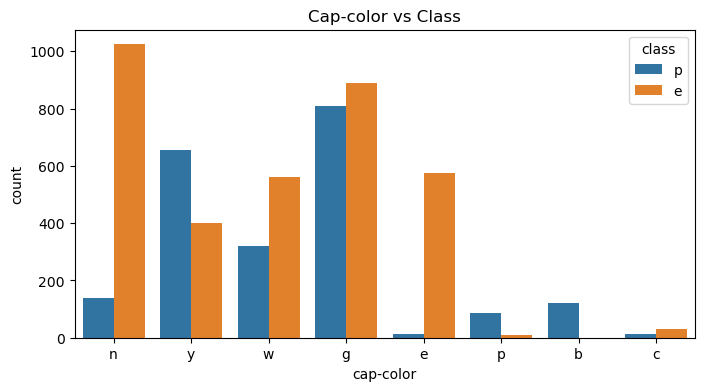

In [11]:
features = ['cap-shape', 'cap-surface', 'cap-color']
for feature in features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='class', data=data)
    plt.title(f'{feature.capitalize()} vs Class')
    plt.show()


In [12]:
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])


In [13]:
print(data.head())


   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          7        1     0                1   
2      0          0            2          6        1     3                1   
3      1          5            3          6        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           2  ...                         2   
1             0          0           2  ...                         2   
2             0          0           3  ...                         2   
3             0          1           3  ...                         2   
4             1          0           2  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [14]:
X = data.drop('class', axis=1)
y = data['class']


## Train-Test Split
Split the dataset into training and testing sets to evaluate model performance.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Training and Evaluation
Train various classifiers to predict whether a mushroom is edible or poisonous. Evaluate their performance.

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

### Comparing Model Accuracies
Visualize the accuracy of different classifiers and identify the best-performing model.

In [18]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 0.9970484061393152
KNN Accuracy: 0.999409681227863


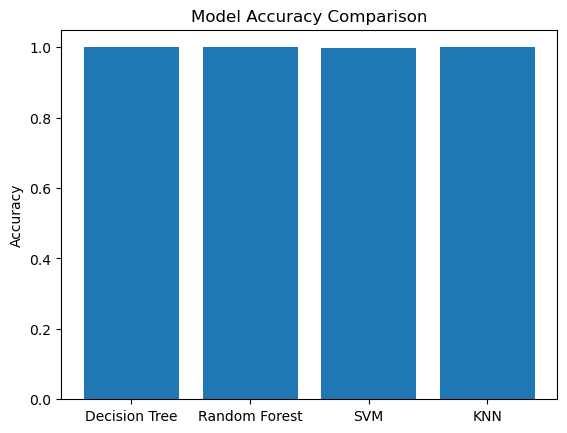

In [22]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn)
]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


### Detailed Model Report: Decision Tree
Analyze the classification report and confusion matrix for the Decision Tree classifier.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print('Decision Tree Report:\n', classification_report(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))


Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

Confusion Matrix:
 [[1058    0]
 [   0  636]]
